In [26]:
import pandas as pd
import matplotlib.pyplot as plt

def result(file_path, nodes_num, init_energy):
    # 1. Read CSV file ===
    filename = file_path
    df = pd.read_csv(filename)

    # Ensure necessary columns exist
    required_cols = ['round', 'avg_RE', 'EC', 'PDR', 'CA', 'LB', 'FI']
    for col in required_cols:
        if col not in df.columns:
            print(f"Warning: Column '{col}' not found in file.")

    # 2. Extract / compute metrics ===
    N = nodes_num  
    E_init = init_energy  

    # Recompute main metrics using given formulas
    E_total_init = N * E_init
    E_total_remain = df['avg_RE'] * N
    EC = E_total_init - E_total_remain  # (9)
    avg_RE = E_total_remain / N         # (10)
    FI = (E_total_remain**2) / (N * (E_total_remain**2))  # simplified if no per-node energy
    LB1 = df['LB'].mean()  
    LB = df['LB']                    # (12)

        
    df_10 = df[df['round'] <= 1000]
    avg_CA = df_10['CA'].mean()                      
    CA1 = avg_CA                        # (13)
    CA = df['CA']
    PDR = df['PDR']                     # (14)
    PLR = 1 - PDR                       # (15)

    # 3. Print latest metric values ===
    print("\nNetwork Metrics (last round)")
    print(f"Energy Consumption (EC): {EC.iloc[-1]:.4f} J")
    print(f"Average Residual Energy (avg_RE): {avg_RE.iloc[-1]:.4f} J")
    print(f"Fairness Index (FI): {FI.iloc[-1]:.4f}")
    print(f"Load Balance (LB): {LB1:.4f}")
    print(f"Coverage Area (CA): {CA1:.4f}")
    print(f"Packet Delivery Ratio (PDR): {PDR.iloc[-1]:.4f}")
    print(f"Packet Loss Ratio (PLR): {PLR.iloc[-1]:.4f}")

    # 4. Sampling every 50 rounds ===
    interval = 50
    df_sampled = df[df['round'] % interval == 0].copy()

    # 5. Plot metrics ===
    metrics = {
        "Energy Consumption (EC)": EC,
        "Average Residual Energy (avg_RE)": avg_RE,
        "Fairness Index (FI)": FI,
        "Load Balance (LB)": LB,
        "Coverage Area (CA)": CA,
        "Packet Delivery Ratio (PDR)": PDR,
        "Packet Loss Ratio (PLR)": PLR
    }

    plt.figure(figsize=(15, 10))
    for i, (name, values) in enumerate(metrics.items(), 1):
        plt.subplot(3, 3, i)
        plt.plot(df['round'], values, 'b-', marker='o', markevery=interval//10, linewidth=1.3)
        plt.title(name, fontsize=10)
        plt.xlabel("Round")
        plt.ylabel(name)
        plt.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()


Network Metrics (last round)
Energy Consumption (EC): 95.0815 J
Average Residual Energy (avg_RE): 0.0492 J
Fairness Index (FI): 0.0100
Load Balance (LB): 0.9215
Coverage Area (CA): 0.8882
Packet Delivery Ratio (PDR): 0.9367
Packet Loss Ratio (PLR): 0.0633


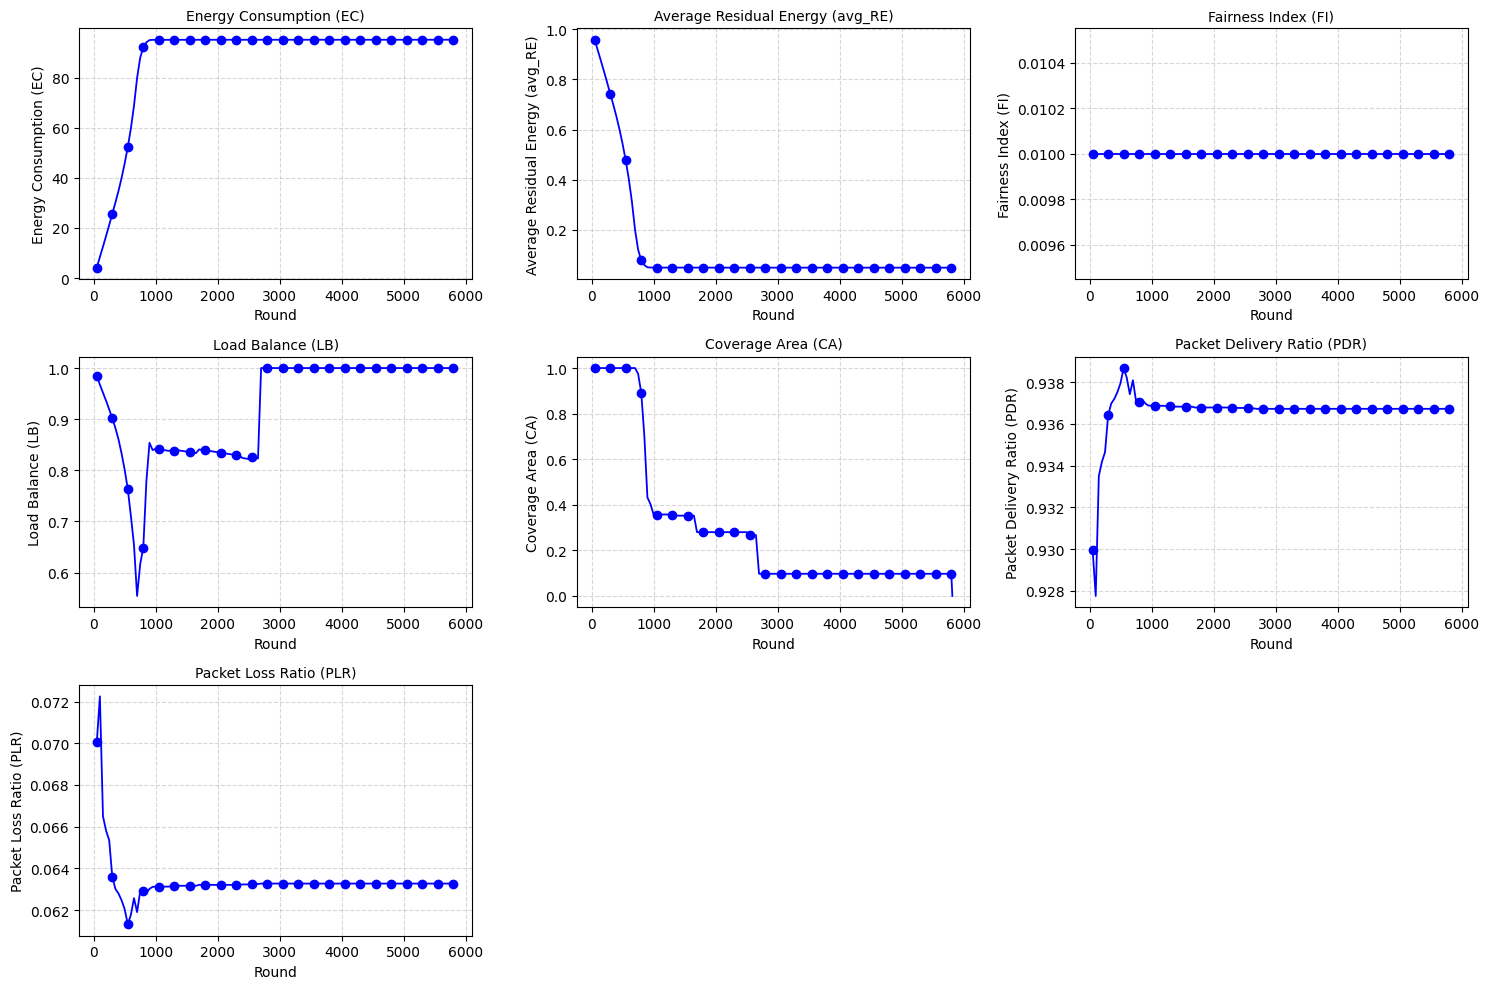

In [27]:
result(r"D:\Papers\DCHPC\DCHPC\ANode_Positioning_200\detailed_wsn_200_200_DRL_results.csv", 100, 1)


Network Metrics (last round)
Energy Consumption (EC): 190.1027 J
Average Residual Energy (avg_RE): 0.0495 J
Fairness Index (FI): 0.0050
Load Balance (LB): 0.8348
Coverage Area (CA): 0.8858
Packet Delivery Ratio (PDR): 0.9432
Packet Loss Ratio (PLR): 0.0568


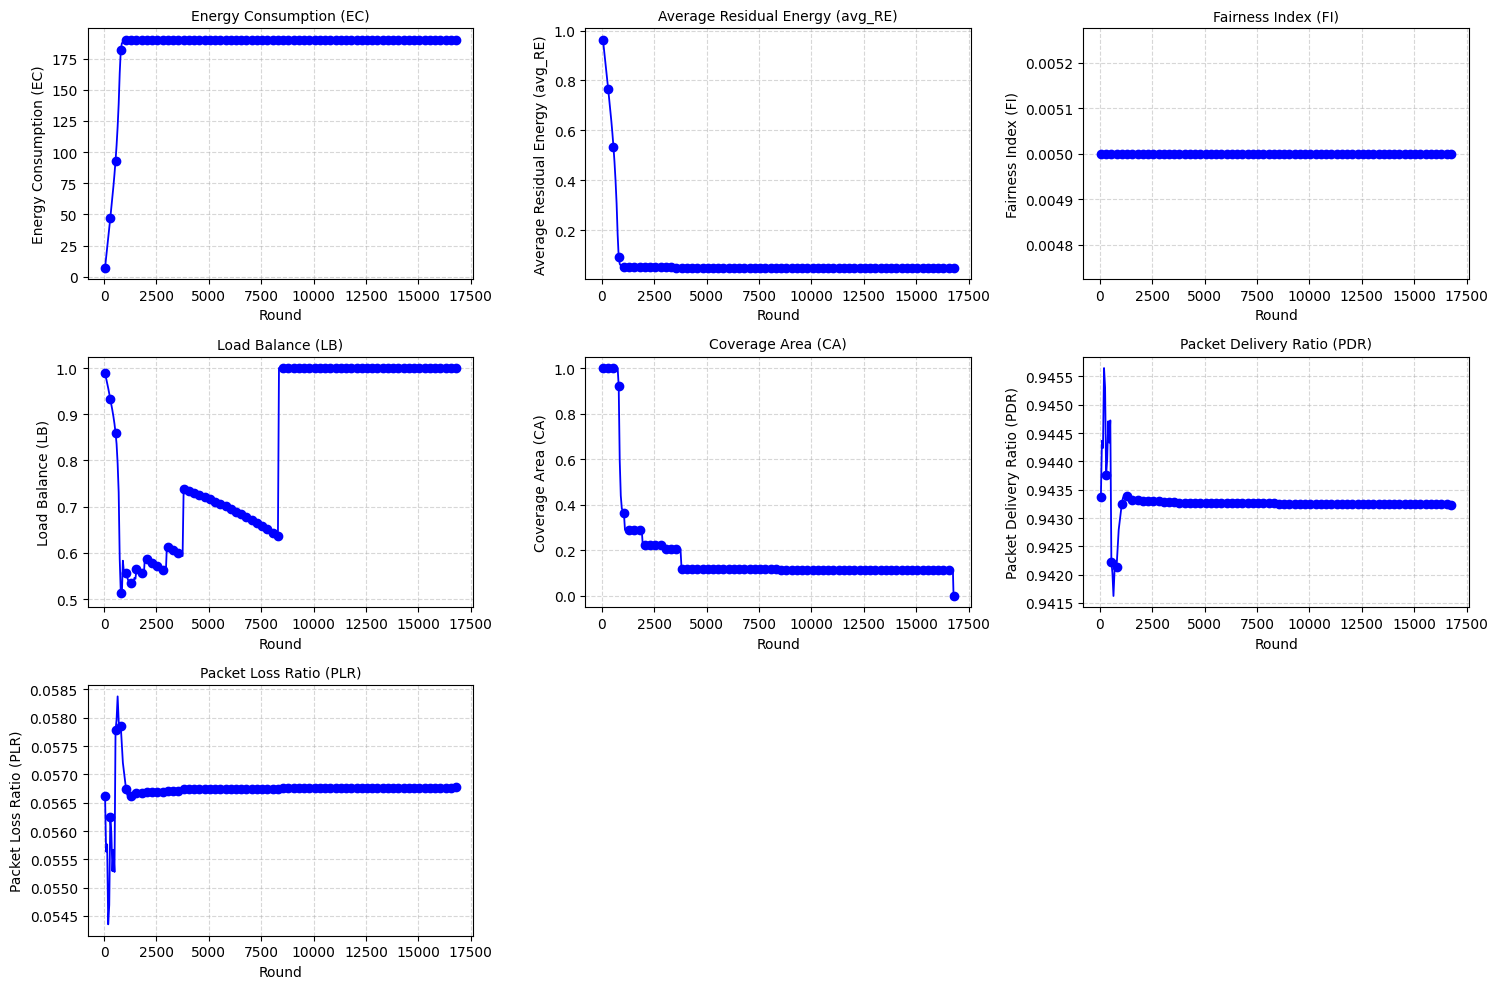

In [28]:
result(r"D:\Papers\DCHPC\DCHPC\ANode_Positioning_200\detailed_wsn_200_200_random_results.csv", 200, 1)


Network Metrics (last round)
Energy Consumption (EC): 192.5592 J
Average Residual Energy (avg_RE): 0.0372 J
Fairness Index (FI): 0.0050
Load Balance (LB): 0.7039
Coverage Area (CA): 0.7440
Packet Delivery Ratio (PDR): 0.9353
Packet Loss Ratio (PLR): 0.0647


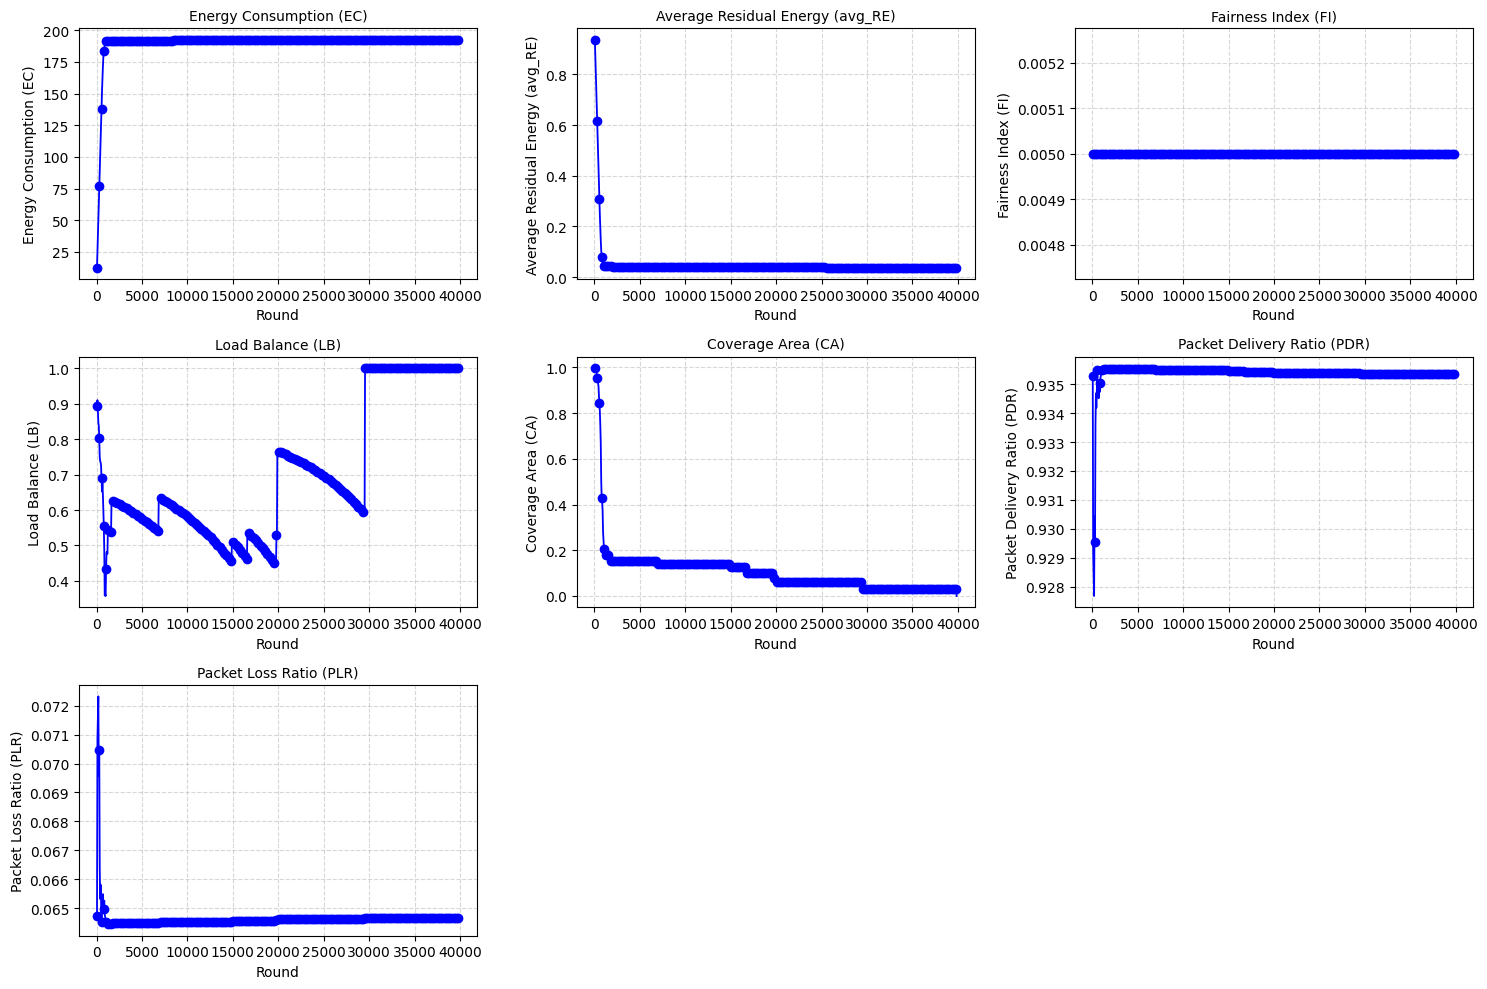

In [29]:
result(r"D:\Papers\DCHPC\DCHPC\ANode_Positioning_200\detailed_wsn_200_500_DRL_results.csv", 200, 1)


Network Metrics (last round)
Energy Consumption (EC): 191.7145 J
Average Residual Energy (avg_RE): 0.0414 J
Fairness Index (FI): 0.0050
Load Balance (LB): 0.6740
Coverage Area (CA): 0.8040
Packet Delivery Ratio (PDR): 0.9353
Packet Loss Ratio (PLR): 0.0647


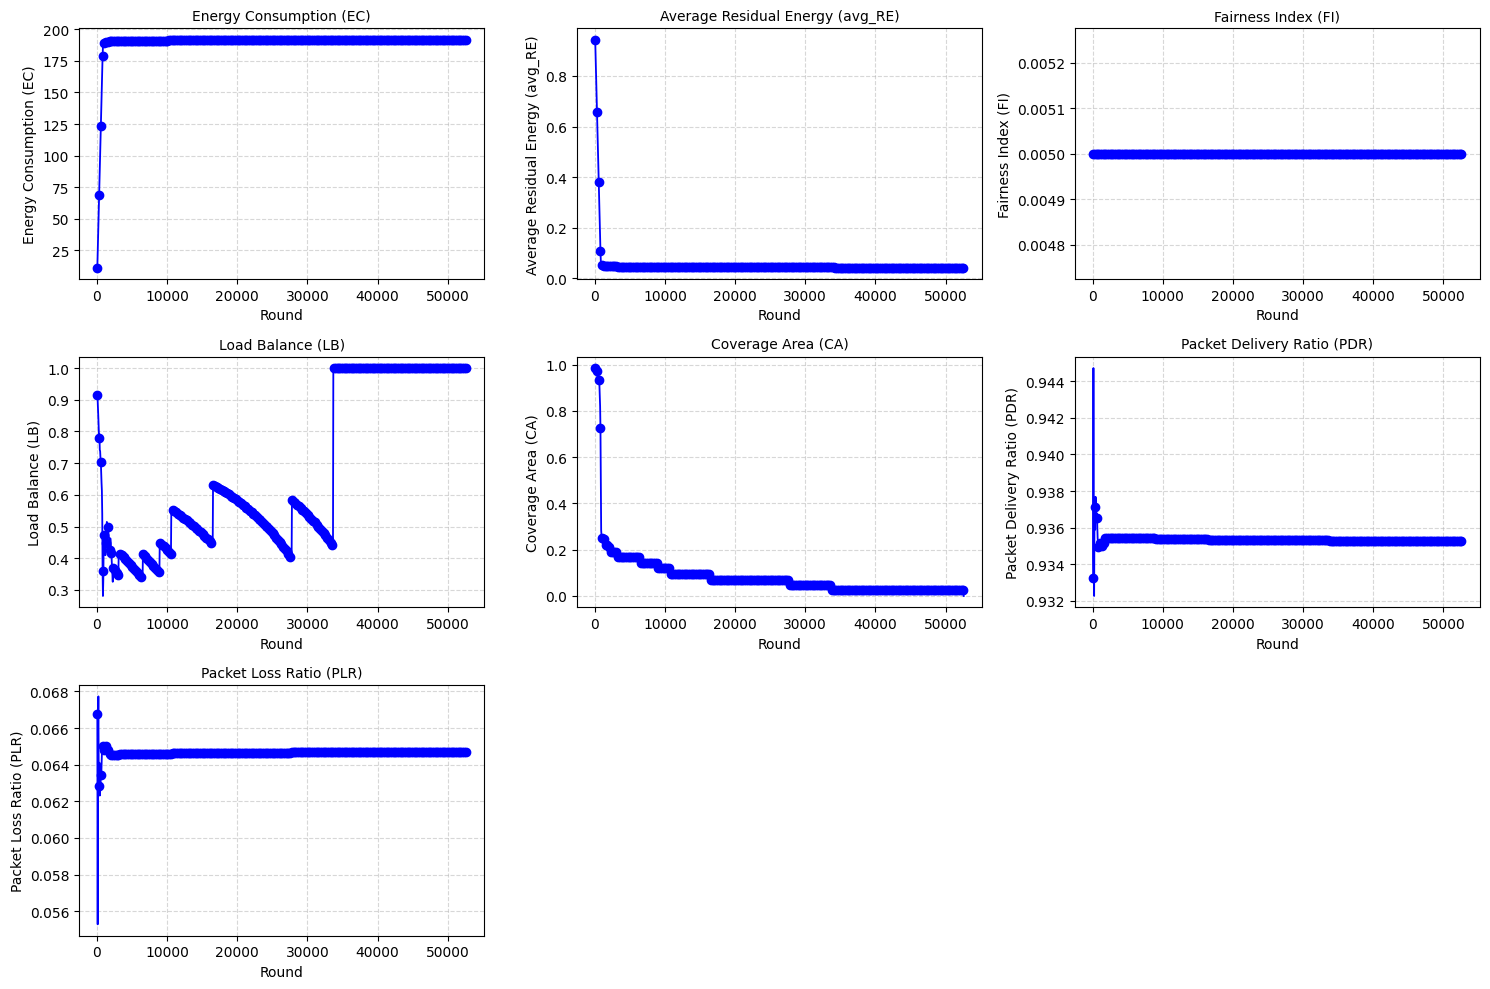

In [30]:
result(r"D:\Papers\DCHPC\DCHPC\ANode_Positioning_200\detailed_wsn_200_500_random_results.csv", 200, 1)


Network Metrics (last round)
Energy Consumption (EC): 194.9267 J
Average Residual Energy (avg_RE): 0.0254 J
Fairness Index (FI): 0.0050
Load Balance (LB): 0.5405
Coverage Area (CA): 0.2545
Packet Delivery Ratio (PDR): 0.9229
Packet Loss Ratio (PLR): 0.0771


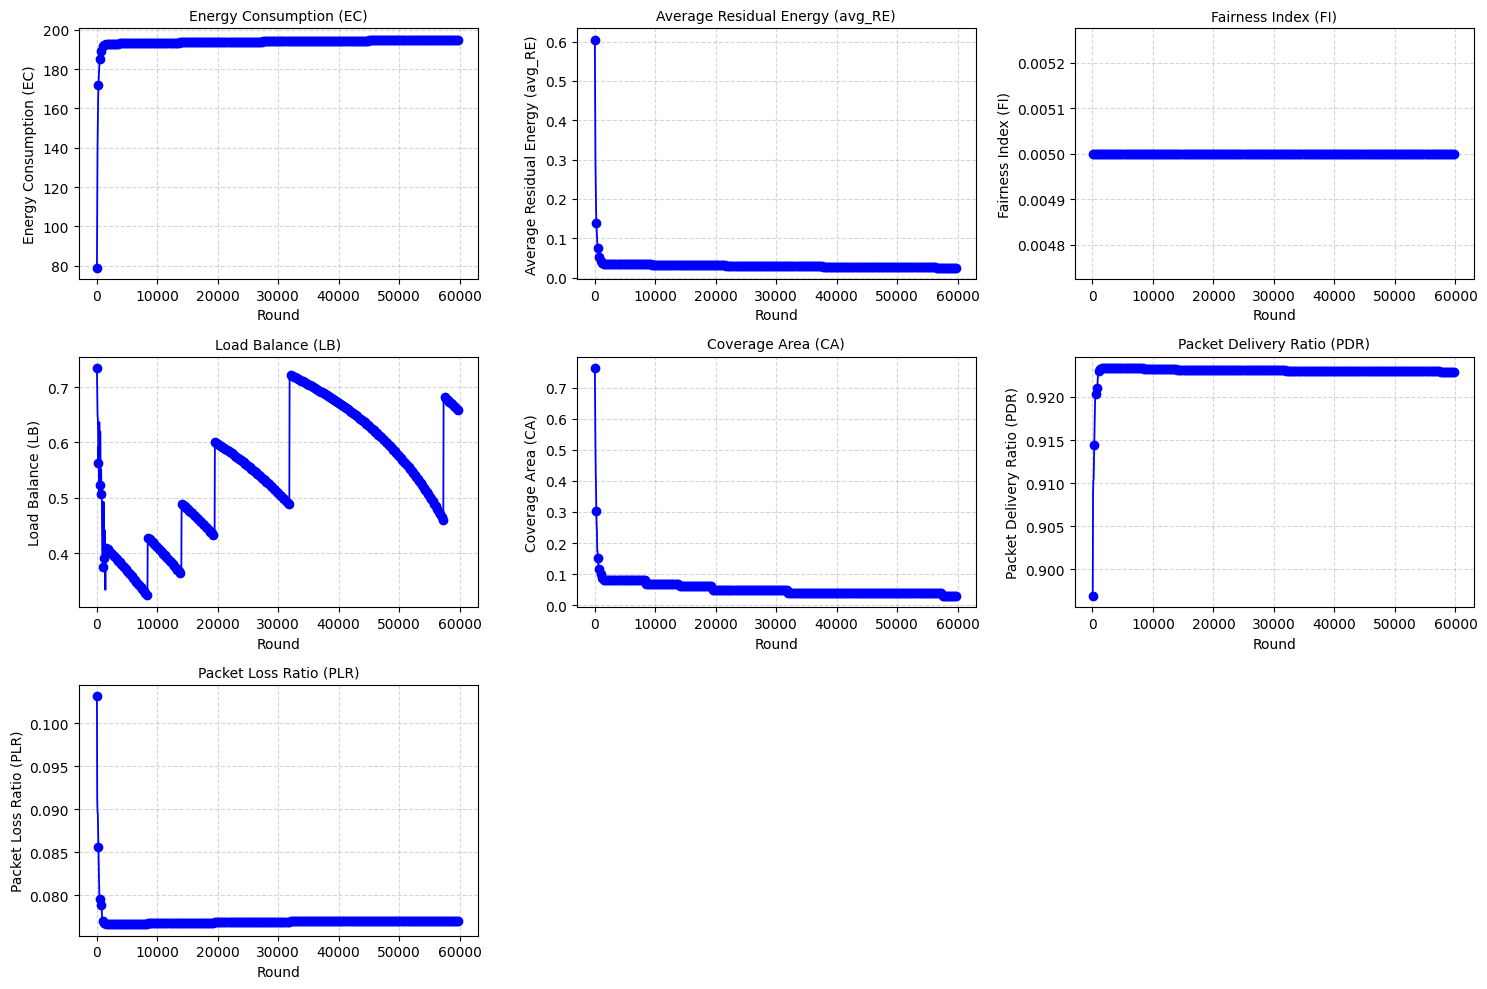

In [31]:
result(r"D:\Papers\DCHPC\DCHPC\ANode_Positioning_200\detailed_wsn_200_800_results.csv", 200, 1)


Network Metrics (last round)
Energy Consumption (EC): 195.1432 J
Average Residual Energy (avg_RE): 0.0243 J
Fairness Index (FI): 0.0050
Load Balance (LB): 0.6023
Coverage Area (CA): 0.2792
Packet Delivery Ratio (PDR): 0.9310
Packet Loss Ratio (PLR): 0.0690


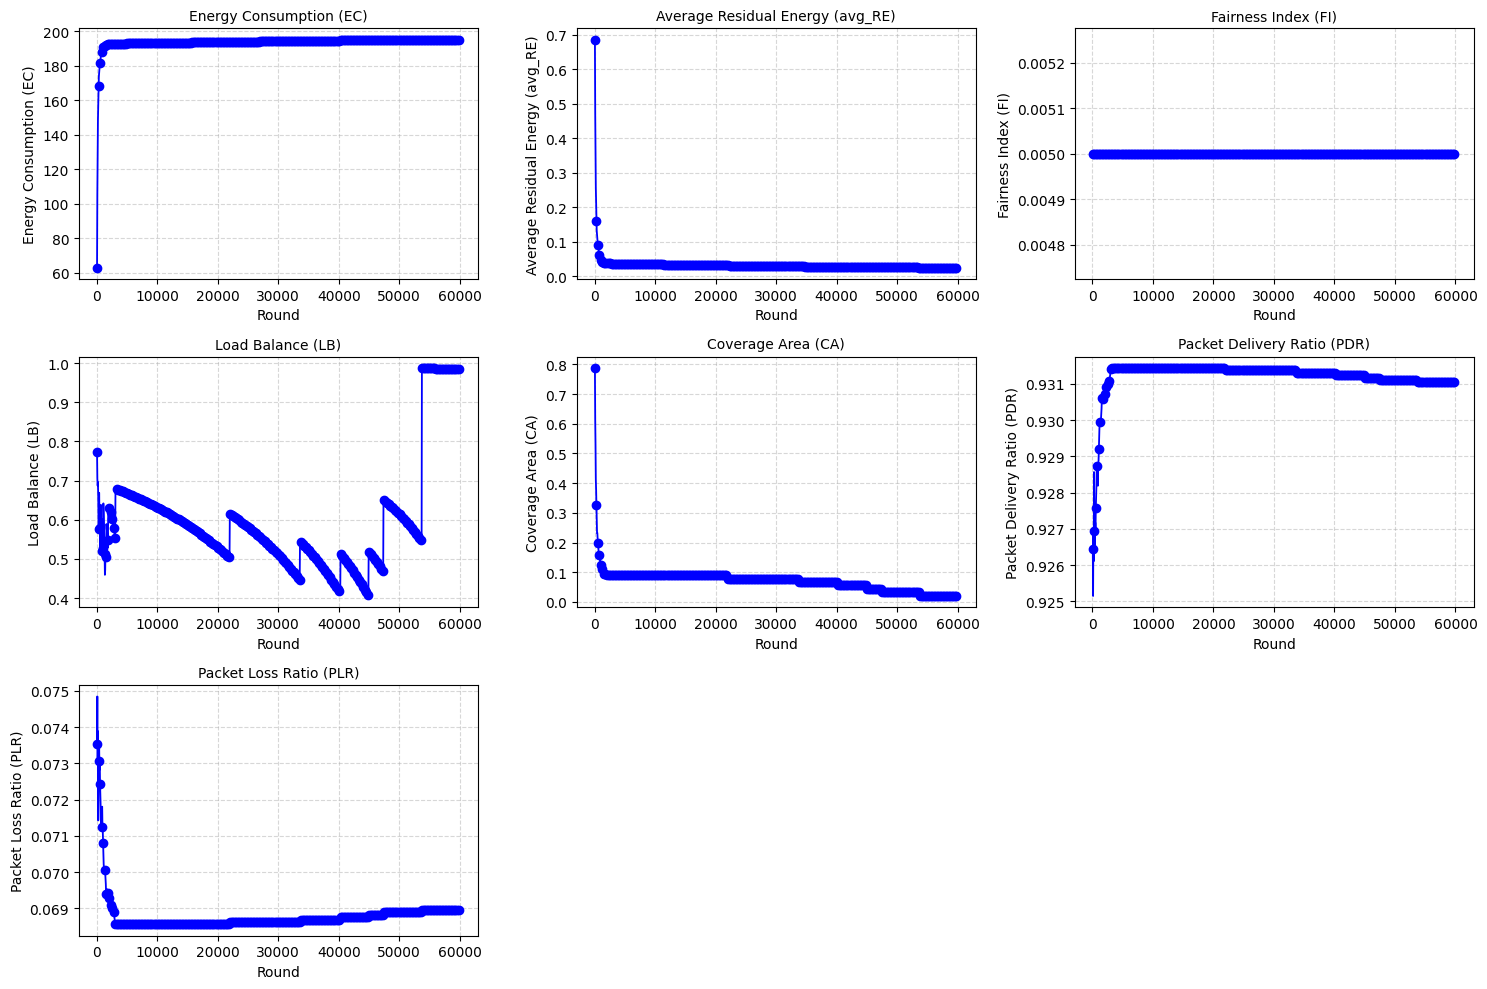

In [32]:
result(r"D:\Papers\DCHPC\DCHPC\ANode_Positioning_200\detailed_wsn_200_800_random_results.csv", 200, 1)


Network Metrics (last round)
Energy Consumption (EC): 196.4791 J
Average Residual Energy (avg_RE): 0.0176 J
Fairness Index (FI): 0.0050
Load Balance (LB): 0.6105
Coverage Area (CA): 0.1320
Packet Delivery Ratio (PDR): 0.9193
Packet Loss Ratio (PLR): 0.0807


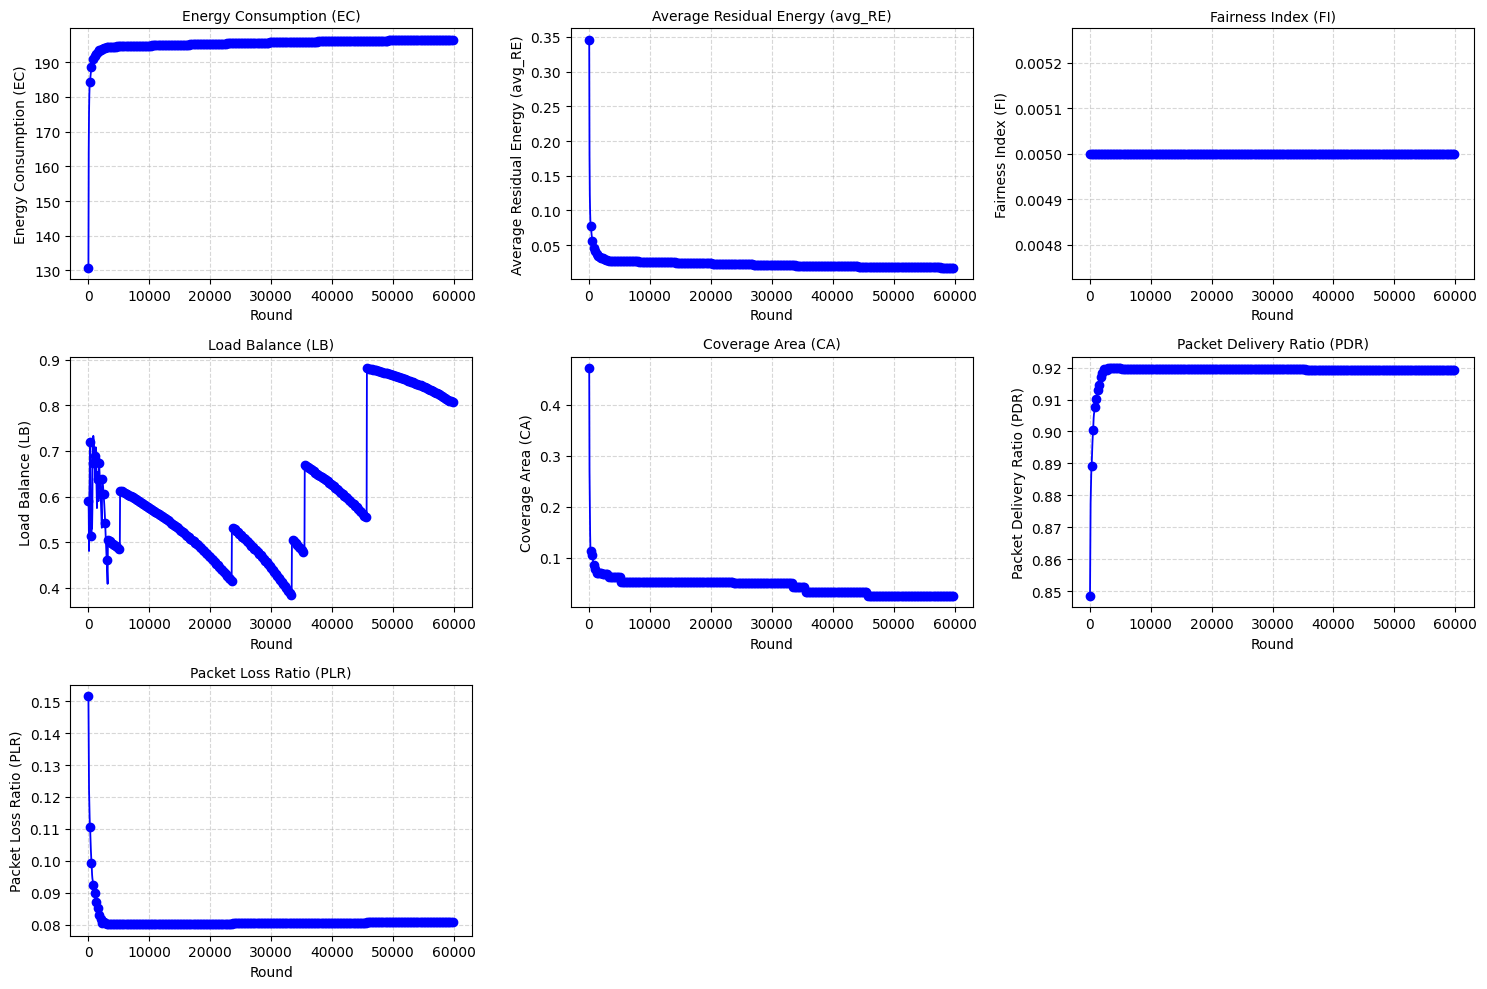

In [33]:
result(r"D:\Papers\DCHPC\DCHPC\ANode_Positioning_200\detailed_wsn_200_1000_DRL_results.csv", 200, 1)


Network Metrics (last round)
Energy Consumption (EC): 196.2974 J
Average Residual Energy (avg_RE): 0.0185 J
Fairness Index (FI): 0.0050
Load Balance (LB): 0.5060
Coverage Area (CA): 0.1348
Packet Delivery Ratio (PDR): 0.9192
Packet Loss Ratio (PLR): 0.0808


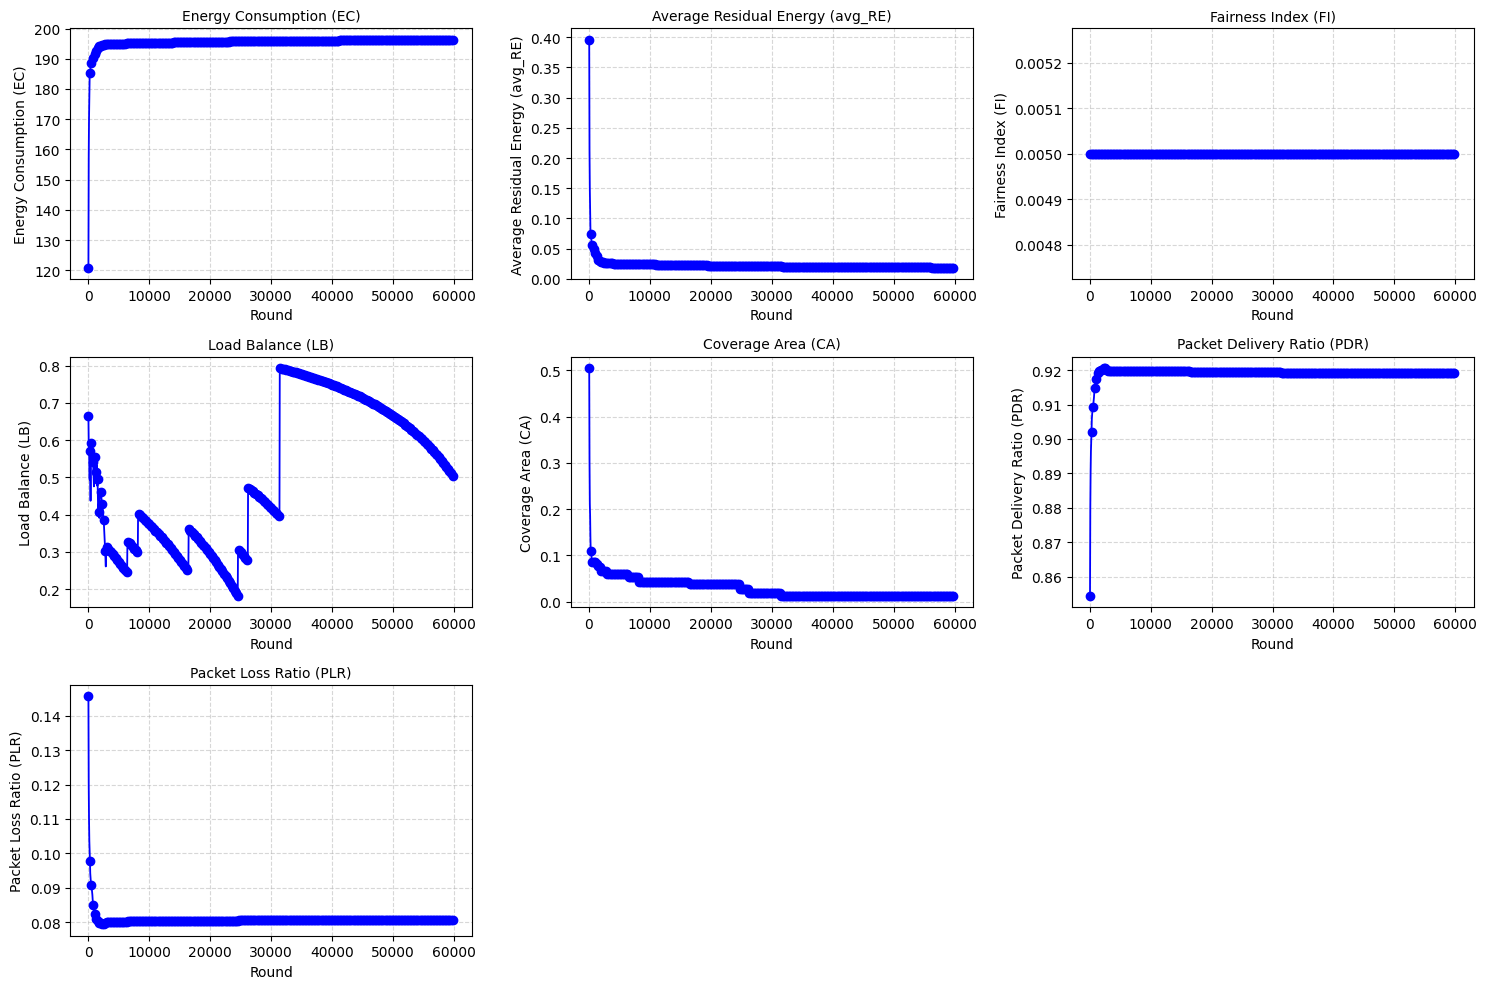

In [34]:
result(r"D:\Papers\DCHPC\DCHPC\ANode_Positioning_200\detailed_wsn_200_1000_random_results.csv", 200, 1)